<a href="https://colab.research.google.com/github/tngus18/gongboohaeboza/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#그래프 모양을 설정
plt.style.use('seaborn')
#글자 크기 설정
sns.set(font_scale=2.5)

#경고 메세지가 출력되지 않도록 설정
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#train.csv파일을 읽어서 df_train에 저장
df_train=pd.read_csv('/content/drive/MyDrive/colabgit/train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- count : 데이터수 (결측치 제외)
- mena : 평균
- std : 표준편차(평균기준 데이터들의차이 제곱 평균)
- min : 최솟값
- max : 최댓값

In [5]:
#df_train의 행의 개수 출력
len(df_train)

891

In [6]:
#각 컬럼의 널값의 수 조회
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#각 컬럼의 널 값의 비율 조회
#각 컬럼의 널 값의의 수(df_train.isnull().sum()) / df_train행의 개수 (len(df_train))
df_train.isnull().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

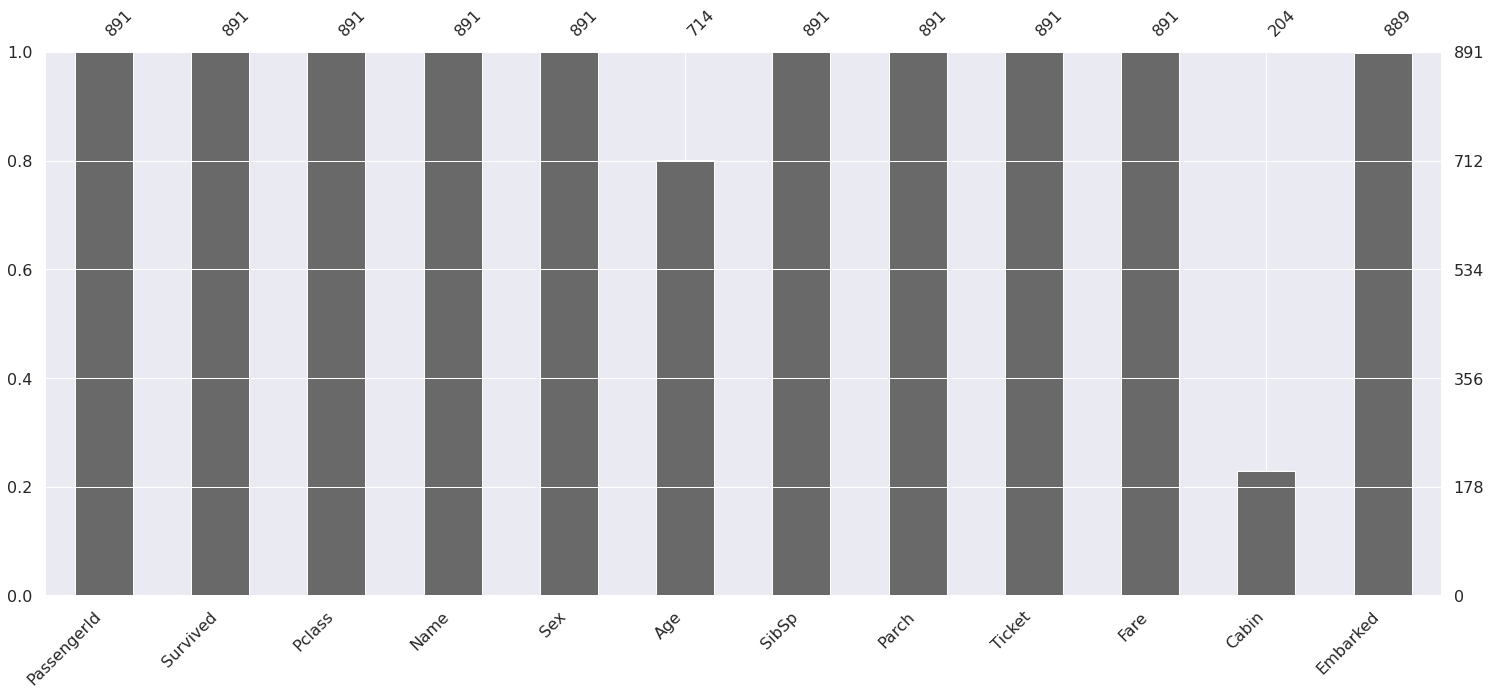

In [8]:
import missingno as msno
#msno.bar는 각 컬럼의 null값이 아닌 데이터의 비율을 그래프로 그려주는 패키지
msno.bar(df=df_train)

- 생존과 관련있는 컬럼 검색
    - 데이터 분석 시 생존과 관련있는 컬럼들로 새로운 컬럼 생성
    - 결측치가 너무 많거나 생존과 관련없는 컬럼은 삭제

In [9]:
#serviced컬럼에 저장된 값들의 빈도수 조회
#0 사망자 549명
#1 생존자 342명
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# 티켓 클래스의 빈도 수 조회
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
# 각 줄이 생존자 Survived==1인지 여부 조회
# 조건 만족하면 True 아니면 False.
df_train['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [12]:
# 생존자 Survived ==1 인 줄의 데이터 조회
df_train[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [37]:
# 생존자 Survived=1 인 줄의 Pclass 조회
df_train[df_train['Survived']==1]['Pclass']

1      1
2      3
3      1
8      3
9      2
      ..
875    3
879    1
880    2
887    1
889    1
Name: Pclass, Length: 342, dtype: int64

In [38]:
# 생존자 Survived==1 인 줄의 Pclass 칸의 빈도 조회
df_train[df_train['Survived']==1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [15]:
# Pclass칸과 Survived칸을 교차해서 빈도수 출력
# pd.crosstab(컬럼1, 컬럼2. margins=합계를 출력하고자 하면 True 아니면 False)
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Sex컬럼과 생존률 관계

In [16]:
#Sex와 Survived칸을 교차해서 빈도수를 출력
#pd.crosstab(컬럼1, 컬럼2, margins=합계를 출력하고자 하면 True 아니면 False
pd.crosstab(df_train['Sex'], df_train['Survived'] , margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


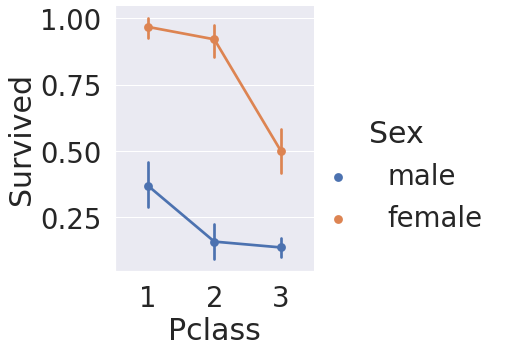

In [17]:
# 각 성별별로 Pclass컬럼과 Survived컬럼을 교차해서 그래프를 그림
# sns.factorplot(컬럼1, 컬럼2, hue=범주에 사용할 컬럼, data=데이터 프레임)
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train)

Age컬럼과 생존률 관계

In [18]:
#df_train['Age]컬럼에서 [df_train['Survived']==1]인 행 대입
survived_age=df_train['Age'][df_train['Survived']==1]
survived_age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [19]:
#df_train['Age']컬럼에서 [df_train['Survived']==0]인 행 대입
dead_age=df_train['Age'][df_train['Survived']==0]
dead_age

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

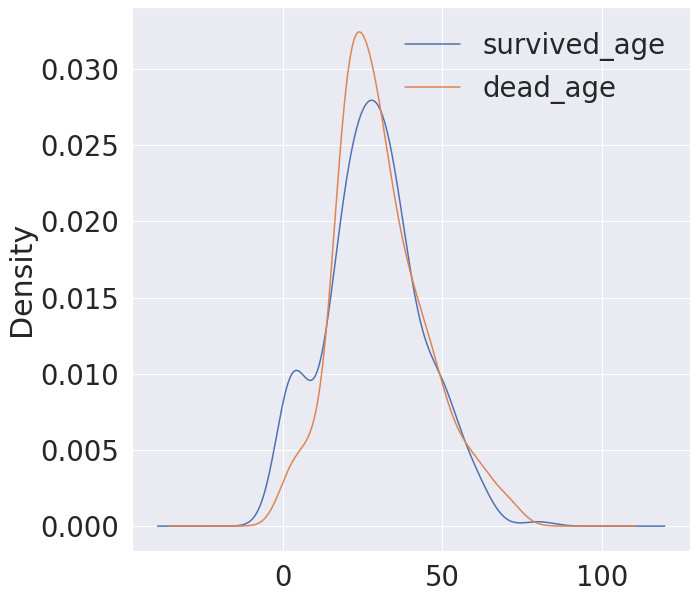

In [20]:
#Age 컬럼에서 각 나이별 survived_Age 와 daed_age비율을 그래프로 그림
#그래프의 크기 설정 가로10 세로10
plt.figure(figsize=(10,10))
#데이터.plot(kind='kde')는 비율을 그래프로 그려줄
survived_age.plot(kind='kde')
dead_age.plot(kind='kde')
#범례
plt.legend(['survived_age','dead_age'])

Embarked컬럼과 생존률 관계

In [21]:
#Embarked컬럼과 Survived컬럼을 교차해서 빈도수 조회
#margings=True(합계출력)
pd.crosstab(df_train['Embarked'],df_train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [22]:
#Embarked 컬럼과 Pclass컬럼을 교차해서 빈도수 조회
#margins=True (합계 출력)
pd.crosstab(df_train['Embarked'], df_train['Pclass'], margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


### 상관관계 파악
- 상관관계 분석이란?
    - 상관관계 분석은 두 변수간에 어떤 선형적인 관계를 갖고 있는지를 분석하는 방법, 두 변수간의 관계를 상광관계라 함.
    - 두개의 변수에 대해 관계가 있는가를 측정하는 단순상관분석, 3개 이상의 변수들 간의 관계를 측정하는 것을 다중상관분석이라함.
    - 연속형수치로 이뤄진 변수와 변수 사이의 관계를 말함
    - 상관관계는 양의 상관관계와 음의 상관관계 그리고 무 상관관계 등으로 구분.

In [23]:
#Survived 컬럼과의 상관관계를 출력
df_train.corr()["Survived"]


# /`` 
# Pclass와 음의 상관관계:
# Pclass가 작아질수록 생존률 증가, 커질수록 감소

# Fare와 양의 상관관계:
# Fare가 커지면 생존률 증가, 작아지면 생존률 감소
# ``/

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

### 컬럼의 기울임 정보 파악

In [24]:
# 각 컬럼의 기울기 정도 조회
df_train.skew()

# 기울어짐이 4를 초과하면 특정구간에 값들이 몰려있는 컬럼럼

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

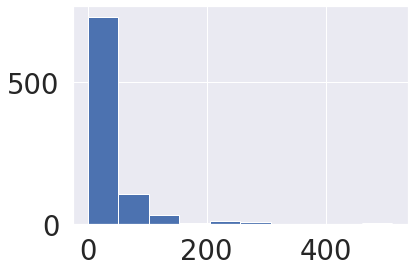

In [25]:
# 가장 기울어진 컬럼 시각화
plt.hist(df_train['Fare'])

In [26]:
# Fare에 log(1+데이터)를 곱한 값을 리턴하는 np.log1p 호출
# Fare 컬럼에 대입
df_train['Fare']=np.log1p(df_train['Fare'])

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

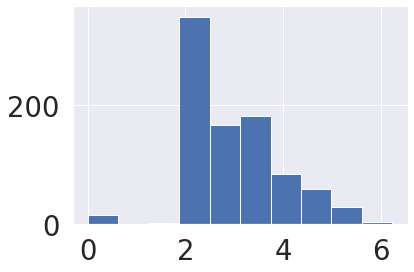

In [27]:
plt.hist(df_train['Fare'])

### 전처리
#### 가족수 컬럼추가
-  SibSp와 Parch를 합하면 Family가 됨.

In [28]:
# 배우자수와 부모 아이수를 합해서 FamilySize컬럼 형성
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [29]:
# FamilySize와 Survived칸을 교차해서 빈도수를 출력
# pd.crosstab(컬럼1, 컬럼2, margins=합계를 출력하고자 하면 True 아니면 False)
pd.crosstab(df_train['FamilySize'], df_train['Survived'], margins=True)

Survived,0,1,All
FamilySize,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


#### Sir 컬럼추가
- 성별과 나이를 나타내는 컬럼 Sir추가

In [30]:
# name 컬럼을 리스트로 변환해서 name_list에 대입
name_list = df_train['Name'].tolist()
name_list

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [31]:
import re # 다음 단어중 하나를 포함하는 문자열을 찾기위한 객체 p 생성
p = re.compile("Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mme|Countess|Lady|Don|Countess")

In [32]:
for name in name_list:
    # p에 대입된 문자열과 name일치하는 문자열을 리턴받아 출력
    # 일치하는 문자열이 name에 일치하는 문자열이 없으면 에러 발생
    print(p.search(name)[0])

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Dr
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Dr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr


TypeError: ignored

In [33]:
for name in name_list:
    # 일치하는 문자열이 존재할때는 p.search가 None이 아님
    if p.search(name) !=None:
        print(p.search(name)[0]) # 문자열 출력
    else:
        print("Others")

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Dr
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Dr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Others
Others
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Others
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Mis

In [34]:
# 기혼여성 Countess, Lady, Mrs = Mrs
# 미혼여성 Mme, Ms, Mlle = Miss
# 성인 남성 Done, Dr, Major = Mr

In [35]:
sir=[]
for name in name_list:
    if p.search(name) !=None:
        # 검색한 문자열이 Countess, Lady, Mrs 중하나 포함
        if p.search(name)[0] in ['Countess', 'Lady', 'Mrs']:
            # Mrs 추가
            sir.append("Mrs")
        elif p.search(name)[0] in ['Mme', 'Ms', 'Mlle']:
            # Miss 추가
            sir.append('Miss')
        elif p.search(name)[0] in ['Don', 'Dr', 'Major']:
            # Mr.추가
            sir.append('Mr')
        else:
            sir.append(p.search(name)[0])
    else:
        # sir에 other 추가
        sir.append('Other')

In [36]:
sir

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr

In [ ]:
#Sir을 포함하는 데이터프레임 칸 Series생성
pd.Series(sir)

In [ ]:
#빈도수를 조회
pd.Series(sir).value_counts()

In [ ]:
#Sir을 포함하는 데이터프레임 칸 Series생성
#df_train에 Sir이라는 칸이름으로 추가
df_train['Sir']=pd.Series(sir)
df_train.head()

In [ ]:
# Sir과 Survived의 빈도수를 교차해서 출력
pd.crosstab(df_train['Sir'], df_train['Survived'], margins=True)

### 결측치처리
#### 나이 결측치 처리
-  기혼여성이 미혼여성보다 나이가 많을 거라고 예상
- Master(도련님, 미성년자남자)의 나이는 어릴것으로 예상
- Sir컬럼에 기혼여성(Mrs), 미혼여성(Miss), 도련님(Master)을 이용해서 나이의 결측치를 처리.
- 나이가 결측치인 행은 Sir컬럼의 값을 참조해서 같은 Sir값을 가진 행의 평균값으로 치환

In [ ]:
# Sir컬럼을 기준으로 평균계산
df_train.groupby('Sir').mean()

In [ ]:
# Sir컬럼을 기준으로 평균중 'Age'컬럼의 평균 계산
df_train.groupby('Sir').mean()['Age']

In [ ]:
# Sir컬럼을 기준으로 평균중 'Mrs'컬럼의 평균 계산
df_train.groupby('Sir').mean().loc['Mrs']

In [ ]:
# Sir컬럼을 기준으로 평균중 'Mrs'컬럼의 나이이평균 계산
df_train.groupby('Sir').mean().loc['Mrs']['Age']

In [ ]:
sir_df=df_train.groupby('Sir').mean()
sir_df

In [ ]:
# Age컬럼이 null인 행의 데이터를 Sir값이 일치하는 행의 평균으로 치환하는 함수
# Age컬럼이 null인 줄의 인덱스 : index
# df_train : df
def process_age_null(index,df):
    # index에 해당하는 줄의 'sir'칸의 데이터를 row_sir에 대입
    row_sir=df.loc[index]['Sir']
    print('index:', index, 'row_sir:', row_sir)
    #sir_df에서 row_sir의 나이의 평균을 sir_mean에 대입
    sir_mean = sir_df.loc[row_sir]['Age']
    print('sir_mean:',sir_mean)
    # sir_mean을 index번째 줄의 Age칸에 대입
    df.at[index,'Age']=sir_mean

In [ ]:
df_train['Age'].isnull()

In [ ]:
# Age칸이 null인 줄의 인덱스를 age_null_index에 대입
age_null_index=df_train.index[df_train['Age'].isnull()]
age_null_index

In [ ]:
for index in age_null_index:
    process_age_null(index,df_train)

In [ ]:
# Age컬럼의 값이 NaN이었던 줄의 Age가 수정됨
df_train.loc[5]

#### Embarked 결측치처리

In [ ]:
# Embarked 컬럼에서 null의 개수 조회
sum(df_train['Embarked'].isnull())

In [ ]:
# Embarked 컬럼이 null인 행에 S 대입ㅂ
df_train['Embarked'].fillna('S',inplace=True)

### 데이터처리
#### 나이 데이터 처리

In [ ]:
# 나이를 10으로 나누는 몫계산
def category_age(age):
    return age//10

In [ ]:
# 컬럼.apply(함수) : 컬럼의 각 데이터마다 함수를 실행해서 결과를 리턴
# df_Train['Age'].applu(category__age) : "Age"컬럼의 각 데이터마다 category_age계산해서 리턴
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_train['Age_cat']

In [ ]:
df_train.head()

#### Sir컬럼 처리

In [ ]:
# Sir컬럼에서 중복을 제외하고 출력
df_train['Sir'].unique()

In [ ]:
# 데이터 앞에 인덱스를 붙여줌
enumerate(df_train['Sir'].unique())

In [ ]:
list(enumerate(df_train['Sir'].unique()))

In [ ]:
# 인덱스와 데이터를 출력
for data in enumerate(df_train['Sir'].unique()):
    print('index:', data[0],',data:',data[1])

In [ ]:
df_train['Sir'].head()

In [ ]:
#Sir 컬럼의 데이터를 숫자로 변환
for data in enumerate(df_train['Sir'].unique()):
    df_train["Sir"].replace(data[1], data[0], inplace=True)

In [ ]:
df_train['Sir'].head()

#### Embarked컬럼 처리

In [ ]:
# Embarked도 C,Q,S 로 이뤄져 있음, 수치형 데이터로 치환
# Emabarked컬럼을 중복을 제거하고 출력
df_train['Embarked'].unique()

In [ ]:
#Embarked칼럼에 인덱스 추가
list(enumerate(df_train['Embarked'].unique()))

In [ ]:
for data in enumerate(df_train['Embarked'].unique()):
    print('index:',data[0],'data:',data[1])

In [ ]:
df_train['Embarked'].head()

In [ ]:
for data in enumerate(df_train['Embarked'].unique()):
    df_train['Embarked'].replace(data[1],data[0], inplace=True)

In [ ]:
df_train['Embarked'].head()

#### Sex컬럼 처리

In [ ]:
df_train['Sex'].head()

In [ ]:
for data in enumerate(df_train['Sex'].unique()):
    df_train['Sex'].replace(data[1], data[0], inplace=True)

In [ ]:
df_train['Sex'].head()

### 컬럼 삭제
- Survived와 관련없는 컬럼
- 결측치가 대부분인 컬럼
- 한가지 값이 대부분인 컬럼

In [ ]:
df_train.head()

In [ ]:
df_train.drop(['PassengerId','Cabin','Ticket','Name','Age'], axis=1, inplace=True)

In [ ]:
df_train.head()

### 분류
#### 학습데이터 테스트데이터 분류

In [ ]:
# 예측하고자 하는 'Survived'컬럼을 y_label 컬럼에 대입
y_label=df_train['Survived']
#df_train에서 'Survived'컬럼 삭제
df_train.drop('Survived',axis=1, inplace=True)

In [ ]:
y_label.head()

In [ ]:
df_train.head()

In [ ]:
from sklearn.model_selection import train_test_split
# 전체 데이터 중 75%는 학습, 25%는 테스트
# random_state 를 설정하면 매 실행시 같은 데이터로 분리
X_train,X_test,y_train,y_test=train_test_split(df_train,y_label, random_state=156)

#### 의사결정 트리

In [ ]:
# 의사결정 트리 알고리즘 서브 패키기를 불러들임
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#IPython 내에 정보를 보여주는 도구용 공용 API
# Image raw데이터가 있는 PNG, JPEG 이미지ㅣ 객체를 만드는 모듈
from IPython.display import Image

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf

In [ ]:
# 의사결정트리를 이용한 학습
dt_clf = dt_clf.fit(X_train,y_train)

In [ ]:
# 테스트 데이터 예측
dt_prediction = dt_clf.predict(X_test)

In [ ]:
# 예측 데이터 출력
dt_prediction

In [ ]:
# 실제 데이터 출력
y_test

In [ ]:
# 모델의 성능을 평가하기 위한 패키지 불러들임
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, dt_prediction, labels=[1,0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dt_prediction)
print('정확도:', accuracy)

In [ ]:
# 컬럼 이름의 리스트 리턴
feature_names = df_train.columns.tolist()
feature_names

In [ ]:
#결과의 이름설정
target_name = np.array(['Dead','Survived'])
target_name

In [ ]:
# 트리를 그래프로 그림
dt_dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                   feature_names = feature_names,
                                   class_names=target_name,
                                   filled=True, rounded=True, 
                                   special_characters =True)

In [ ]:
# 그래프를 생성하는 graphviz의 Dot언어를 파이썬 인터페이서에 제공하는 모듈
import pydotplus

In [ ]:
dt_gragh = pydotplus.graph_from_dot_data(dt_dot_data)

In [ ]:
Image(dt_gragh.create_png())

In [ ]:
dt_gragh.write_pdf('tatanic.pdf')

In [ ]:
# 1등석 고객 (Pclass ;1)
# 남자 male (Sex:0)
# 함께 탑승한 형제와 배우자 수 1 (SibSp : 1)
# 함께 탑승한 부모 아이의 수 2 (Parch : 2)
# 탑승료 250불 (Fare : 250) -> 로그값 대입
# C 항구에서 답승 (Embarked : 1)
# 전체 가족수 3 (FamilySize : 3)
# 남자성인 Mr (Sir:0)
# 41살 (Age_cat : 4.0)
new_data = np.array([[1,0,1,2, np.log1p(250), 1,3,0,4.0]])

In [ ]:
new_data

In [ ]:
dt_clf.predict(new_data)
# 0 = 사망

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
import numpy as np

In [ ]:
# RandomForestclassifier 객체 생성해서 rf_clf에 대입
rf_clf = RandomForestClassifier()
rf_clf

In [ ]:
# 학습데이터 X_train과 y_train을 이용하여 트리를 생성
rf_clf.fit(X_train, y_train)

In [ ]:
#rf_clf.predict(X_test) : X_test데이터를 예측하고 결과를 리턴
pred = rf_clf.predict(X_test)
pred

In [ ]:
# accuracy_score(y_test, pred) : y_test와 pred를 비교해서 정확도 출력
accuracy = accuracy_score(y_test, pred)
print('랜덤포레스트정확도: {}'. format(accuracy))

#### XGBoost

In [ ]:
# 사이킷런 래퍼 XGBoost클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# XGBoost 객체 생성
# 트리의 개수 500
xgb_clf = XGBClassifier(n_estimators=500)

#트리의 파라미터들을 대입
params = {'max_depth':[5, 7, 9, 11], 'min_child_weight':[1,3,5,7], 'colsample_bytree':[0.5, 0.75, 1.0]}

#XGBoost의 최적의 파라미터를 찾고 최적의 파라미터를 포함하는 XGBoost객체를 생성하는 GSV생성
gridcv= GridSearchCV(xgb_clf, param_grid=params)

In [ ]:
# 학습을 진행하면서 가장 최적의 파라미터를 찾고 최적의 파라미터를 갖는 XGBoost객체 생성
gridcv.fit(X_train, y_train,
           early_stopping_rounds=30,
           eval_metric='error',
           eval_set=[(X_train, y_train), (X_test, y_test)])

In [ ]:
# 최적의 파라미터 출력
# 전체 컬럼에서 100% 사용
# 트리의 깊이는 7
# 단계 마다 트리는 최소 3개
print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(figsize=(10,12))
# 어떤 컬럼이 예측에 중요한지 점수 출력
plot_importance(gridcv.best_estimator_, ax=ax)

In [ ]:
# X_test를 이용해서 생존 예측
pred = gridcv.predict(X_test)
pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 오차 행렬 구해서 출력
confusion = confusion_matrix(y_test, pred)
confusion

In [ ]:
accuracy = accuracy_score(y_test, pred)
accuracy